# Plotting SAC Files


#### First import ObsPy (Seismic) Observatory Python

In [ ]:
import obspy

### Look for a SAC file in the directory here
To load it, examine the commands below:

In [4]:
from obspy import read
st = read('./IM.NV01..SHZ.D.2007.204.223009.SAC', debug_headers=True)
st

1 Trace(s) in Stream:
IM.NV01..SHZ | 2007-07-23T22:30:09.000000Z - 2007-07-23T22:55:09.000000Z | 40.0 Hz, 60001 samples

### Examine header information
SAC files may or may not come with useful header information ...

In [ ]:
print(st[0].stats)

### Quick Plot

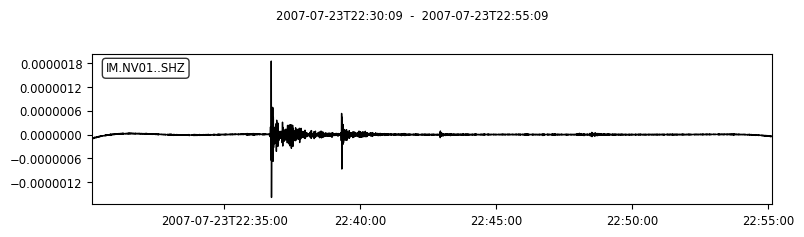

In [7]:
st.plot()